In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("houseprice.csv")

In [20]:
dataNum = data.drop(["Id"],axis=1).iloc[:500].select_dtypes(np.number)

In [21]:
from sklearn.impute import SimpleImputer
sim = SimpleImputer(strategy="mean")

In [22]:
dataNumImputed = pd.DataFrame(sim.fit_transform(dataNum), columns=dataNum.columns)

In [23]:
from sklearn.preprocessing import normalize
data_scaled = normalize(dataNumImputed)
data_scaled = pd.DataFrame(data_scaled, columns=dataNumImputed.columns)
data_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.000287,0.000311,0.040484,0.000034,0.000024,0.009596,0.009596,0.000939,0.003382,0.0,...,0.000000,0.000292,0.000000,0.0,0.0,0.0,0.0,0.000010,0.009620,0.998927
1,0.000110,0.000440,0.052801,0.000033,0.000044,0.010868,0.010868,0.000000,0.005379,0.0,...,0.001639,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000028,0.011039,0.998274
2,0.000268,0.000304,0.050261,0.000031,0.000022,0.008940,0.008944,0.000724,0.002171,0.0,...,0.000000,0.000188,0.000000,0.0,0.0,0.0,0.0,0.000040,0.008971,0.998511
3,0.000499,0.000427,0.068019,0.000050,0.000036,0.013639,0.014031,0.000000,0.001538,0.0,...,0.000000,0.000249,0.001937,0.0,0.0,0.0,0.0,0.000014,0.014288,0.997139
4,0.000240,0.000335,0.056936,0.000032,0.000020,0.007985,0.007985,0.001397,0.002615,0.0,...,0.000767,0.000335,0.000000,0.0,0.0,0.0,0.0,0.000048,0.008017,0.998169


# Hierarchical Clustering

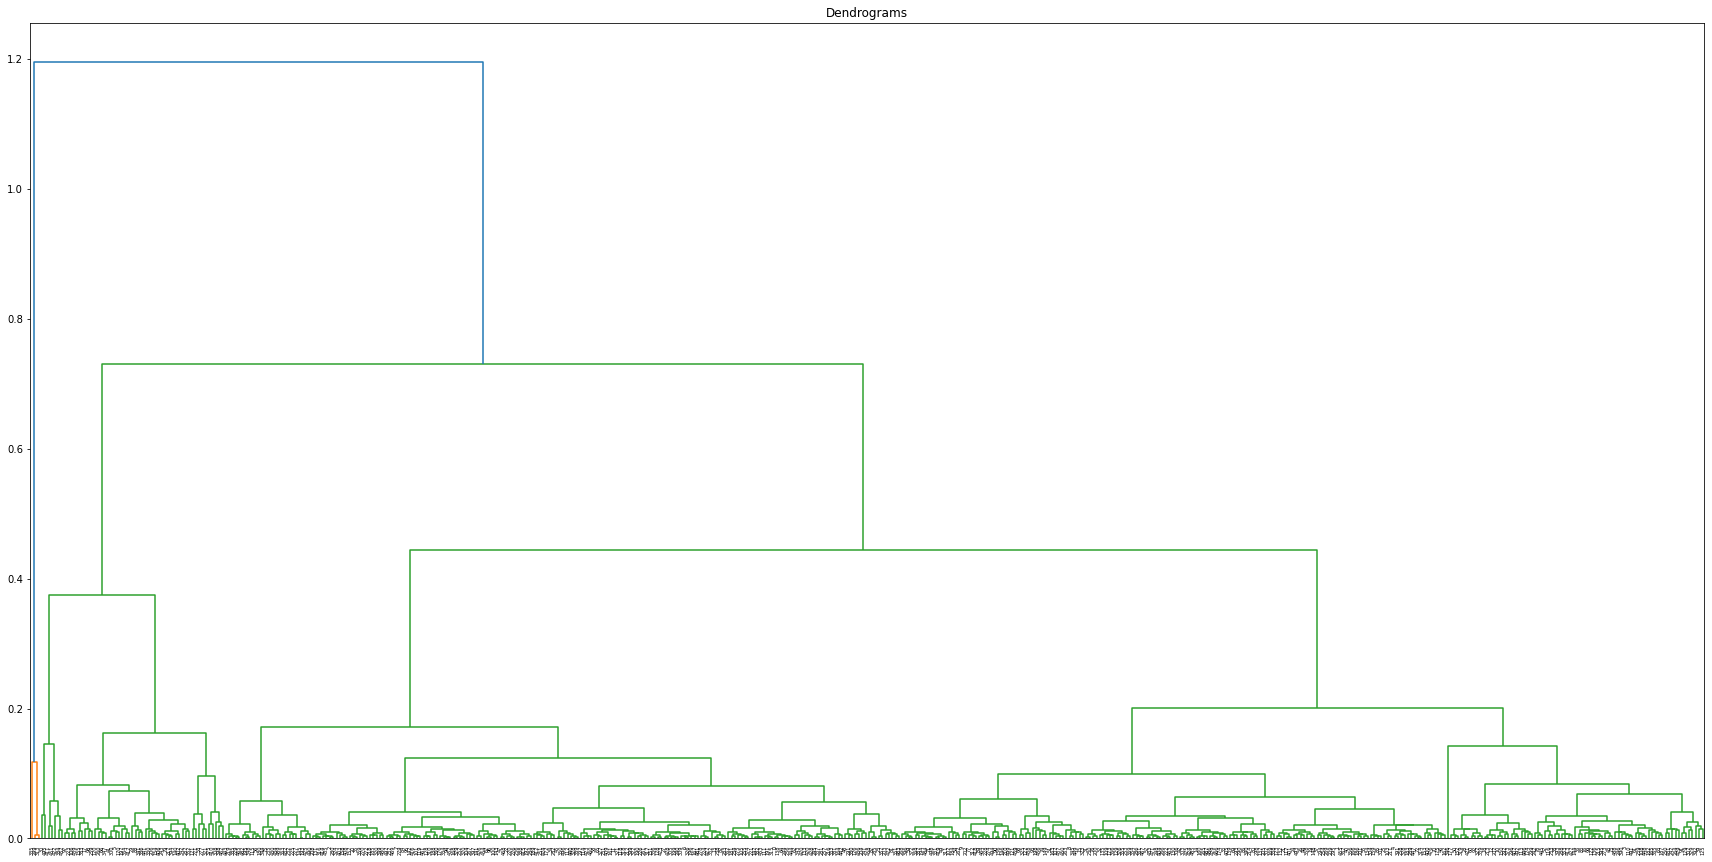

In [25]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

## Ward Method

The linkage function specifying the distance between two clusters is computed as the increase in the "error sum of squares" (ESS) after fusing two clusters into a single cluster

Intra cluster the error should be minimum while inter cluster the error should be maximum

In [28]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  

clusters = cluster.fit_predict(data_scaled)

In [29]:
data_scaled["Clusters"] = clusters

In [32]:
data_scaled.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Clusters
0,0.000287,0.000311,0.040484,0.000034,0.000024,0.009596,0.009596,0.000939,0.003382,0.00000,...,0.000292,0.000000,0.000000,0.0,0.0,0.000000,0.000010,0.009620,0.998927,1
1,0.000110,0.000440,0.052801,0.000033,0.000044,0.010868,0.010868,0.000000,0.005379,0.00000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000028,0.011039,0.998274,0
2,0.000268,0.000304,0.050261,0.000031,0.000022,0.008940,0.008944,0.000724,0.002171,0.00000,...,0.000188,0.000000,0.000000,0.0,0.0,0.000000,0.000040,0.008971,0.998511,1
3,0.000499,0.000427,0.068019,0.000050,0.000036,0.013639,0.014031,0.000000,0.001538,0.00000,...,0.000249,0.001937,0.000000,0.0,0.0,0.000000,0.000014,0.014288,0.997139,0
4,0.000240,0.000335,0.056936,0.000032,0.000020,0.007985,0.007985,0.001397,0.002615,0.00000,...,0.000335,0.000000,0.000000,0.0,0.0,0.000000,0.000048,0.008017,0.998169,0
5,0.000348,0.000591,0.098180,0.000035,0.000035,0.013863,0.013877,0.000000,0.005092,0.00000,...,0.000209,0.000000,0.002226,0.0,0.0,0.004869,0.000070,0.013974,0.994664,2
6,0.000065,0.000244,0.032824,0.000026,0.000016,0.006523,0.006526,0.000605,0.004456,0.00000,...,0.000186,0.000000,0.000000,0.0,0.0,0.000000,0.000026,0.006533,0.999317,1
7,0.000300,0.000354,0.051824,0.000035,0.000030,0.009849,0.009849,0.001198,0.004288,0.00016,...,0.001018,0.001138,0.000000,0.0,0.0,0.001747,0.000055,0.010028,0.998346,1
8,0.000384,0.000392,0.047030,0.000054,0.000038,0.014839,0.014985,0.000000,0.000000,0.00000,...,0.000000,0.001575,0.000000,0.0,0.0,0.000000,0.000031,0.015431,0.998239,0
9,0.001606,0.000423,0.062714,0.000042,0.000051,0.016388,0.016481,0.000000,0.007193,0.00000,...,0.000034,0.000000,0.000000,0.0,0.0,0.000000,0.000008,0.016972,0.997334,0


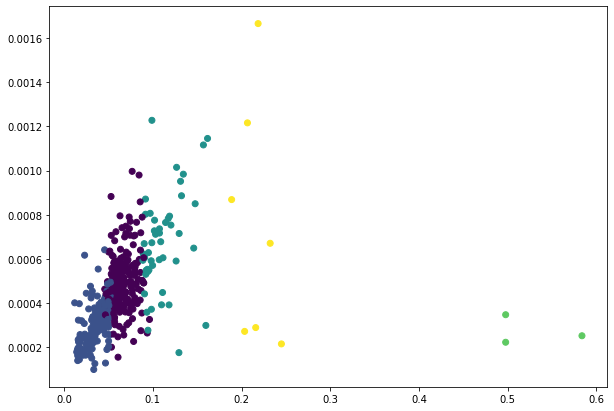

In [34]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['LotArea'], data_scaled['LotFrontage'], c=cluster.labels_)
plt.show()

# K-Means Clustering

In [36]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=5)
clusters = Kmean.fit_predict(data_scaled)

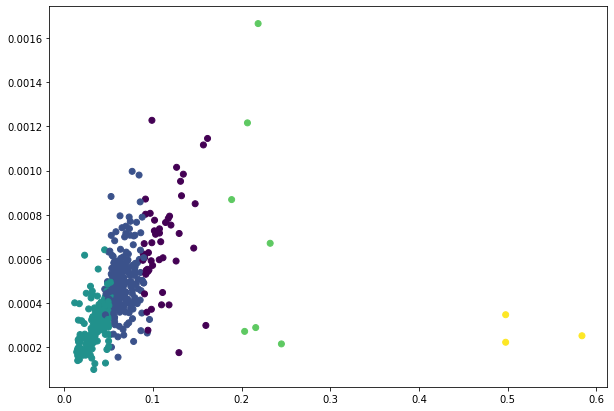

In [37]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['LotArea'], data_scaled['LotFrontage'], c=Kmean.labels_)
plt.show()

In [38]:
data_scaled["clusters_KM"] = clusters

In [41]:
data_scaled[["Clusters", "clusters_KM"]]

,Clusters,clusters_KM
0,1,2
1,0,1
2,1,2
3,0,1
4,0,1
...,...,...
495,4,3
496,1,2
497,1,2
498,0,1


# Elbow Curve to find best cluster no

In [44]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
clust = range(1, 10)
 
for k in clust:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled)
    dist = sum(np.min(cdist(data_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data_scaled.shape[0]
    distortions.append(dist)
    iner = kmeanModel.inertia_
    inertias.append(iner)
 
    mapping1[k] = dist
    mapping2[k] = iner

In [45]:
distortions

[0.9128294751101983,
 0.4744873944142257,
 0.12517764700241643,
 0.026076576989329008,
 0.01468389877294555,
 0.01333843499048043,
 0.012195934239687092,
 0.011631517735681466,
 0.011324117391854826]

In [46]:
inertias

[552.1940651689467,
 290.98879197680367,
 90.90147419321092,
 4.590264616762404,
 0.15218541709987127,
 0.1318614731679523,
 0.11469571635921481,
 0.09982582906938677,
 0.08925714496484961]

In [47]:
mapping1 ## Optional

{1: 0.9128294751101983,
 2: 0.4744873944142257,
 3: 0.12517764700241643,
 4: 0.026076576989329008,
 5: 0.01468389877294555,
 6: 0.01333843499048043,
 7: 0.012195934239687092,
 8: 0.011631517735681466,
 9: 0.011324117391854826}

In [48]:
mapping2 ## Optional

{1: 552.1940651689467,
 2: 290.98879197680367,
 3: 90.90147419321092,
 4: 4.590264616762404,
 5: 0.15218541709987127,
 6: 0.1318614731679523,
 7: 0.11469571635921481,
 8: 0.09982582906938677,
 9: 0.08925714496484961}

## Elbow based on Distortion

Distortion is the sum of square errors (SSE) used to find Inter Cluster Errors

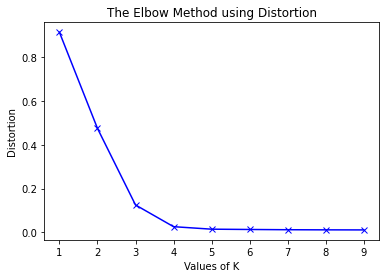

In [50]:
plt.plot(clust, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

## Elbow based on Inertia

Inertia is the sum of square errors (SSE) used to find Intra Cluster Errors

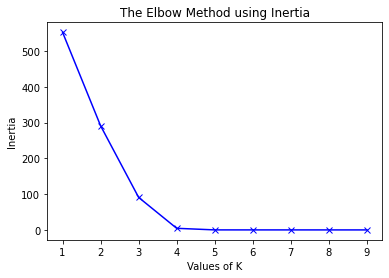

In [51]:
plt.plot(clust, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()